In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

W tym zeszycie rozpatrzymy zależności między uwarunkowaniami biologicznymi (tj. wzrostem, wagą, wiekiem i narodowością) a grą w NBA.

Przedmiotem analizy będzie 22 kompletnych sezonów w XXI wieku, począwszy od sezonu 1999-2000 aż do sezonu 2021-2022.

Dla każdego sezonu dostępne są cztery ramki danych: dane osobiste (bios), statystyki łączne (totals), statystyki średnie na mecz (per_game) i statystyki średnie na minutę (per_minute)

In [25]:
dataframes = {}
YEAR_FROM = 2000
YEAR_TO = 2022

for year in range(YEAR_FROM, YEAR_TO + 1):
    bios_file = f'DataFrames\\Bios\\bios_{year}.csv'
    bios = pd.read_csv(bios_file, index_col='Player')
    dataframes["bios", year] = bios

    totals_file = f'DataFrames\\Totals\\totals_{year}.csv'
    totals = pd.read_csv(totals_file, index_col='Player')
    dataframes["totals", year] = totals

    per_game_file = f'DataFrames\\Averages\\averages_{year}.csv'
    per_game = pd.read_csv(per_game_file, index_col='Player')
    dataframes["per_game", year] = per_game

    per_minute_file = f'DataFrames\\PerMinute\\per_minute_{year}.csv'
    per_minute = pd.read_csv(per_minute_file, index_col='Player')
    dataframes["per_minute", year] = per_minute

Poniżej przedstawiono liczbę graczy dla każdego sezonu i każdej kategorii

In [26]:
years = {key[1] for key in dataframes.keys()}
presentation = pd.DataFrame({'bios': {year: dataframes["bios", year].shape[0] for year in years},
                            'totals': {year: dataframes["totals", year].shape[0] for year in years},
                            'per_game': {year: dataframes["per_game", year].shape[0] for year in years},
                            'per_minute': {year: dataframes["per_minute", year].shape[0] for year in years},
                            })
display(presentation)

,bios,totals,per_game,per_minute
2000,439,439,439,439
2001,441,441,441,441
2002,440,440,440,440
2003,428,428,428,428
2004,442,442,442,442
2005,464,464,464,464
2006,458,458,458,458
2007,458,458,458,458
2008,451,451,451,451
2009,445,445,445,445


Łączna liczba analizowanych koszykarzy wynosi:

In [31]:
all_seasons = pd.merge(dataframes["bios", YEAR_FROM], dataframes["totals", YEAR_FROM], on='Player')
for year in range(YEAR_FROM + 1, YEAR_TO + 1):
    all_seasons = pd.concat([all_seasons, pd.merge(dataframes["bios", year], dataframes["totals", year], on='Player')])
pd.set_option('display.max_columns', None)
age_to_points = pd.pivot_table(all_seasons, values='PTS', index='Player', columns='Age')
display(age_to_points)

Age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,
A.C. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,413.0,367.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Bramlett,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Guyton,NaN,NaN,NaN,NaN,NaN,198.0,244.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Hammons,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Price,NaN,NaN,NaN,NaN,NaN,410.0,323.0,172.0,441.0,44.0,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zion Williamson,NaN,540.0,1647.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zoran Dragic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zoran Planinic,NaN,NaN,NaN,153.0,217.0,191.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


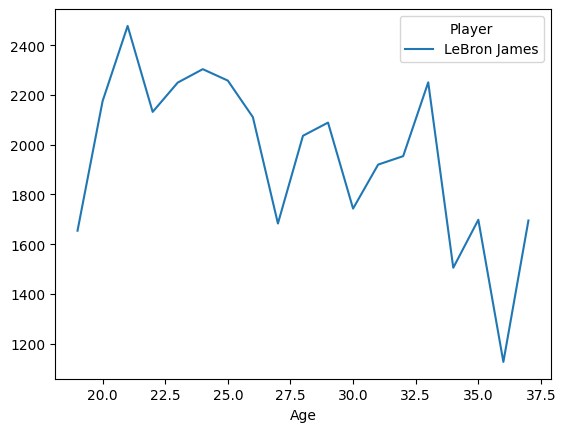

In [82]:
lebron_age_to_points = age_to_points.loc[["LeBron James"]]
lebron_age_to_points = lebron_age_to_points.transpose()
lebron_age_to_points.plot()
plt.show()

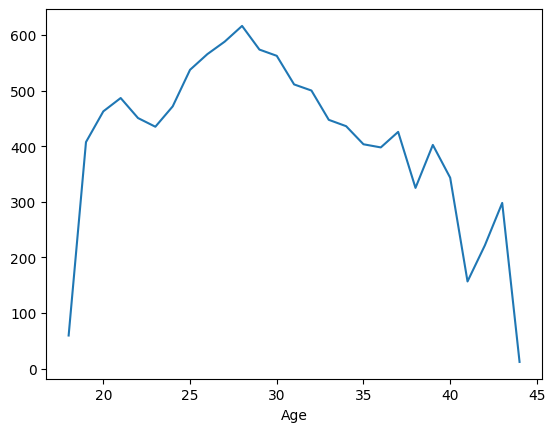

In [83]:
average_points_for_age = age_to_points.mean()
average_points_for_age.plot()
plt.show()

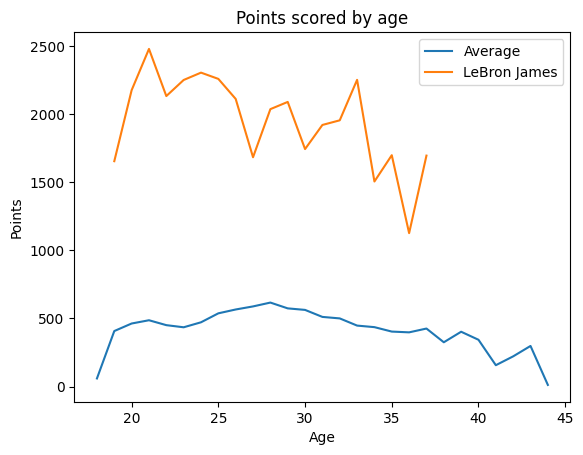

In [84]:
fig, ax = plt.subplots()
average_points_for_age = age_to_points.mean()
ax.plot(average_points_for_age.index, average_points_for_age.values, label='Average')
ax.plot(lebron_age_to_points.index, lebron_age_to_points.values, label='LeBron James')
ax.set_title('Points scored by age')
ax.set_xlabel('Age')
ax.set_ylabel('Points')
ax.legend()
plt.show()

In [76]:
average_points_for_age = age_to_points
display(average_points_for_age)
#average_points_for_age.plot()
#plt.show()

Age,18,19,...,43,44
Player,,,,,
A.C. Green,NaN,NaN,...,NaN,NaN
A.J. Bramlett,NaN,NaN,...,NaN,NaN
A.J. Guyton,NaN,NaN,...,NaN,NaN
A.J. Hammons,NaN,NaN,...,NaN,NaN
A.J. Price,NaN,NaN,...,NaN,NaN
...,...,...,...,...,...
Zion Williamson,NaN,540.0,...,NaN,NaN
Zoran Dragic,NaN,NaN,...,NaN,NaN
Zoran Planinic,NaN,NaN,...,NaN,NaN


In [ ]:
merged_df = pd.merge(dataframes[0], totals_dfs[0], on='Player')

In [64]:
df_all_seasons = pd.concat([dataframes["bios", year] for year in years])
curry = df_all_seasons.loc[["Stephen Curry"]]
display(curry)

,Pos,HT,WT,Age,Teams,GP,YOS,Pre-Draft Team,Draft Status,Nationality
Player,,,,,,,,,,
Stephen Curry,G,6-3,198,21,GSW,80,0,Davidson,2009 Rnd 1 Pick 7,United States
Stephen Curry,G,6-3,198,22,GSW,74,1,Davidson,2009 Rnd 1 Pick 7,United States
Stephen Curry,G,6-3,198,23,GSW,26,2,Davidson,2009 Rnd 1 Pick 7,United States
Stephen Curry,G,6-3,198,24,GSW,78,3,Davidson,2009 Rnd 1 Pick 7,United States
Stephen Curry,G,6-3,198,25,GSW,78,4,Davidson,2009 Rnd 1 Pick 7,United States
Stephen Curry,G,6-3,198,26,GSW,80,5,Davidson,2009 Rnd 1 Pick 7,United States
Stephen Curry,G,6-3,198,27,GSW,79,6,Davidson,2009 Rnd 1 Pick 7,United States
Stephen Curry,G,6-3,198,28,GSW,79,7,Davidson,2009 Rnd 1 Pick 7,United States
Stephen Curry,G,6-3,198,29,GSW,51,8,Davidson,2009 Rnd 1 Pick 7,United States


In [120]:
df_all_seasons = pd.concat([dataframes["bios", year] for year in years])
curry = df_all_seasons.loc[["Stephen Curry", "Kevin Durant"]][["Age"]]
#curry = curry.reset_index().set_index(['Player', curry.groupby('Player').cumcount()+1])['Age'].unstack()
#curry.columns = [str(year) for year in range(2008, 2022)]
#curry.columns.name = None
display(curry)

,Age
Player,
Stephen Curry,21
Stephen Curry,22
Stephen Curry,23
Stephen Curry,24
Stephen Curry,25
Stephen Curry,26
Stephen Curry,27
Stephen Curry,28
Stephen Curry,29


In [90]:
#other = curry.pivot(index='Player', columns=curry.groupby('Player').cumcount(), values='Value')
display(dataframes["bios", 2022].loc["Stephen Curry", "Age"])

33

In [45]:
df_all_seasons = pd.concat([dataframes["bios", year] for year in years], axis=1)
curry = df_all_seasons[["Age"]]
display(curry)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [58]:
series_list = [dataframes["bios", year]['Age'] for year in years]
series_list = [s.reset_index(drop=False) for s in series_list]
result_series = pd.concat(series_list, axis=1)
pd.set_option('display.max_columns', None)
display(result_series)

,Player,Age,Player,Age,Player,Age,Player,Age,Player,Age,Player,Age,Player,Age,Player,Age,Player,Age,Player,Age,Player,Age,Player,Age,Player,Age,Player,Age,Player,Age,Player,Age,Player,Age,Player,Age,Player,Age,Player,Age,Player,Age,Player,Age,Player,Age
0,Tariq Abdul-Wahad,25.0,Mahmoud Abdul-Rauf,31.0,Tariq Abdul-Wahad,27.0,Tariq Abdul-Wahad,28.0,Shareef Abdur-Rahim,27.0,Shareef Abdur-Rahim,28.0,Shareef Abdur-Rahim,29.0,Shareef Abdur-Rahim,30.0,Shareef Abdur-Rahim,31.0,Alex Acker,26.0,Arron Afflalo,24.0,Jeff Adrien,25.0,Jeff Adrien,26.0,Quincy Acy,22.0,Quincy Acy,23.0,Quincy Acy,24.0,Quincy Acy,25.0,Alex Abrines,23.0,Alex Abrines,24.0,Alex Abrines,25.0,Steven Adams,26.0,Precious Achiuwa,21.0,Precious Achiuwa,22
1,Shareef Abdur-Rahim,23.0,Tariq Abdul-Wahad,26.0,Shareef Abdur-Rahim,25.0,Shareef Abdur-Rahim,26.0,Malik Allen,25.0,Cory Alexander,31.0,Alex Acker,23.0,Hassan Adams,22.0,Arron Afflalo,22.0,Hassan Adams,24.0,Alexis Ajinca,21.0,Arron Afflalo,25.0,Arron Afflalo,26.0,Jeff Adrien,27.0,Steven Adams,20.0,Jordan Adams,20.0,Jordan Adams,21.0,Quincy Acy,26.0,Quincy Acy,27.0,Quincy Acy,28.0,Bam Adebayo,22.0,Jaylen Adams,24.0,Steven Adams,28
2,Cory Alexander,26.0,Shareef Abdur-Rahim,24.0,Courtney Alexander,24.0,Courtney Alexander,25.0,Ray Allen,28.0,Malik Allen,26.0,Malik Allen,27.0,Maurice Ager,23.0,Maurice Ager,24.0,Arron Afflalo,23.0,LaMarcus Aldridge,24.0,Maurice Ager,27.0,Blake Ahearn,27.0,Arron Afflalo,27.0,Jeff Adrien,28.0,Steven Adams,21.0,Steven Adams,22.0,Steven Adams,23.0,Steven Adams,24.0,Jaylen Adams,22.0,LaMarcus Aldridge,34.0,Steven Adams,27.0,Bam Adebayo,24
3,Ray Allen,24.0,Cory Alexander,27.0,Victor Alexander,32.0,Malik Allen,24.0,Rafer Alston,27.0,Ray Allen,29.0,Ray Allen,30.0,LaMarcus Aldridge,21.0,Blake Ahearn,23.0,Maurice Ager,25.0,Joe Alexander,23.0,Alexis Ajinca,22.0,Solomon Alabi,23.0,Josh Akognon,27.0,Arron Afflalo,28.0,Jeff Adrien,29.0,Arron Afflalo,30.0,Arron Afflalo,31.0,Bam Adebayo,20.0,Steven Adams,25.0,Kyle Alexander,23.0,Bam Adebayo,23.0,Santi Aldama,21
4,Rafer Alston,23.0,Courtney Alexander,23.0,Malik Allen,23.0,Ray Allen,27.0,Chris Andersen,25.0,Tony Allen,23.0,Tony Allen,24.0,Malik Allen,28.0,LaMarcus Aldridge,22.0,Blake Ahearn,24.0,Malik Allen,31.0,Solomon Alabi,22.0,Cole Aldrich,23.0,Cole Aldrich,24.0,Alexis Ajinca,25.0,Arron Afflalo,29.0,Alexis Ajinca,27.0,Alexis Ajinca,28.0,Arron Afflalo,32.0,Bam Adebayo,21.0,Nickeil Alexander-Walker,21.0,LaMarcus Aldridge,35.0,LaMarcus Aldridge,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thaddeus Young,33
601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trae Young,23
602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Omer Yurtseven,23
603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cody Zeller,29


In [41]:
df_all_seasons = pd.concat([dataframes["bios", year] for year in years]["Age"])
#df_player_stats = df_all_seasons.pivot(index='Player', )
#df_player_stats.columns = df_player_stats.columns.droplevel(0)
#curry = df_all_seasons.loc["Stephen Curry"]
"""df_player_stats = df_all_seasons.pivot(index='Player', columns='level_1')
df_player_stats.columns = df_player_stats.columns.droplevel(0)
display(df_player_stats)"""
pd.set_option('display.max_columns', None)
display(df_all_seasons)

<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
C:\Users\marci\AppData\Local\Temp\ipykernel_23868\3847593827.py:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  df_all_seasons = pd.concat([dataframes["bios", year] for year in years]["Age"])
C:\Users\marci\AppData\Local\Temp\ipykernel_23868\3847593827.py:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  df_all_seasons = pd.concat([dataframes["bios", year] for year in years]["Age"])
C:\Users\marci\AppData\Local\Temp\ipykernel_23868\3847593827.py:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  df_all_seasons = pd.concat([dataframes["bios", year] for year in years]["Age"])
C:\Users\marci\AppData\Local\Temp\ipykernel_23868\3847593827.py:1: SyntaxWar

TypeError: list indices must be integers or slices, not str